## Song Characteristics on Popularity

## Introduction

With the growth of music streaming for the last few year, Spotify has become the de-factor way of connecting people with music. One of the most common ways to search for music through Spotify is by searching for popular artists as they usually have the most popular songs. This in turn will make these songs even more popular! And the cycle lives on. But is it possible to predict how popular a song will be based on some rudimental measures such as acousticness, energy, liveness, loudness,...

The main research question: Are there any strong predictors for popularity among Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, Duration, Valence?

## Analysis

The first step is to select only columns required for building the model with popularity as response and (Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, Duration, Valence) as predictors. All of these are continuous variables which doesn't require additional transform or encoding.

Uni-variate description of popularity (1-100 score)

variable | mean  | sd | median
---|-------|----|---
popularity | 69.1  | 17.5 | 72



The goal here is not for prediction but interpretation so cross validation will be skipped. We want to check on the significance of each predictor through OLS model. There is also no need for standardization on the predictors since we don't apply any regularization. First, checking on assumptions of OLS:

1. Linearity - Residuals vs fitted plot show no clear pattern or trend. This assumption is satisfied.
2. Independent of errors - Durbin-Watson return value of 1.79 which is between 1.5 and 2.5 => this assumption is also satisfied.
3. Normal distribution of errors - Both QQplot and Anderson Darling test shows residuals are not normally distributed. Fortunately, OLS is robust with this assumption as long as others are satisfied.
4. Homoscedasticity - het_breuschpagan shows this assumption is also satisfied.

Thus, we proceed to regress popularity on the rest of the variable.

## Results

###<center>P-value for Coefficients<center/>

variable | coef | p-value
--- | --- | ---
const | 59.7 | 0.000
danceability | 18.6 | 0.078
energy | 7.1 | 0.566
loudness | 0.45 | 0.551
speechiness | -11.97 | 0.280
acousticness | 0.57 | 0.929
liveness | 1.77 | 0.825
tempo | -0.04 | 0.339
duration | 0.000 | 0.500
valence | -4.5 | 0.465

The heatmap of correlation suggests that there are no strong predictors for popularity in these measures (only a weak one in danceability). And the result of the model show the same conclusion.
OLS showing only danceability is significant (at 0.1 level) while the rest are very insignificant. Who would have guess people love music that they can dance to?
Adjusted r-squared value is very low at near 0 which signify that this model does not contain any strong predictor for popularity.

## Discussion

There are 2 main observation here:

- OLS model is used without any transformation that might improve the model. However, feature engineering is hard without context or understanding of the relationship between measures.
- These are very simple charateristics of song that might not tell the whole picture. A more elaborate set of measures might yield better result.
- Since song is also a language art, NLP is a powerful way to predict popular song as well as tunes and rhythms.

A quick application of the result is that judging a song by their cover might not be a bad strategy after all!

## References

[statsmodels documentation](https://www.statsmodels.org/stable/index.html)

[Durbin-Watson test for Independence](https://www.statology.org/durbin-watson-test-python/)

[What make a song popular](https://knowledge.wharton.upenn.edu/article/what-makes-songs-popular-its-all-about-you/)





## EDA

In [5]:
# extra imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import durbin_watson

% matplotlib inline
plt.style.use('tableau-colorblind10')

UsageError: Line magic function `%` not found.


In [6]:
# import data
col_list = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo',
            'Duration', 'Valence']
spotify = pd.read_csv('D:\\DataspellProjects\\MAS_Fall_22\\Stat_487\\data\\spotify.csv', usecols=col_list)
spotify.columns = spotify.columns.str.lower()
spotify.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration,valence
0,83,0.722,0.893,-3.255,0.0475,0.0441,0.0673,119.932,116750,0.439
1,90,0.798,0.620,-7.079,0.2320,0.4140,0.1120,120.031,164000,0.235
2,82,0.726,0.787,-2.494,0.0737,0.0090,0.0596,124.990,199987,0.888
3,75,0.882,0.689,-4.027,0.1240,0.3900,0.0501,97.963,161627,0.746
4,54,0.534,0.565,-7.546,0.3070,0.0627,0.1120,194.034,193360,0.529


## EDA

In [7]:
# uni-variate statistic
spotify.popularity.describe()

count    200.00000
mean      69.11500
std       17.51243
min        0.00000
25%       64.75000
50%       72.00000
75%       80.00000
max       95.00000
Name: popularity, dtype: float64

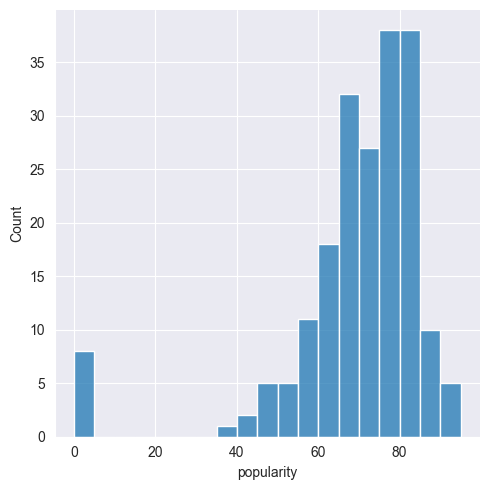

In [8]:
# historgram
sns.displot(spotify.popularity)

In [9]:
# heatmap of correlation
corr_matrix = spotify.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
# sns.pairplot(spotify.iloc[:,:-1])

,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration,valence
popularity,1.000000,0.123021,0.100293,0.124253,-0.072242,-0.081729,-0.008757,-0.063426,0.045074,0.026674
danceability,0.123021,1.000000,0.104962,0.208544,0.215767,-0.281951,-0.099147,-0.036293,-0.119924,0.318092
energy,0.100293,0.104962,1.000000,0.735851,-0.081007,-0.506400,0.063635,0.196669,0.065729,0.388622
loudness,0.124253,0.208544,0.735851,1.000000,-0.089714,-0.481419,0.009921,0.142537,0.077123,0.308988
speechiness,-0.072242,0.215767,-0.081007,-0.089714,1.000000,-0.110752,0.179709,0.128136,-0.074770,-0.042355
acousticness,-0.081729,-0.281951,-0.506400,-0.481419,-0.110752,1.000000,0.058572,-0.018246,0.033275,-0.068527
liveness,-0.008757,-0.099147,0.063635,0.009921,0.179709,0.058572,1.000000,0.019826,0.115612,0.084560
tempo,-0.063426,-0.036293,0.196669,0.142537,0.128136,-0.018246,0.019826,1.000000,0.128430,0.078569
duration,0.045074,-0.119924,0.065729,0.077123,-0.074770,0.033275,0.115612,0.128430,1.000000,-0.071422
valence,0.026674,0.318092,0.388622,0.308988,-0.042355,-0.068527,0.084560,0.078569,-0.071422,1.000000


In [10]:
# define var
y = spotify.pop('popularity')
X = spotify
X = sm.add_constant(X)

In [14]:
# OLS
res_ols = sm.OLS(y, X).fit()
res_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9598
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.475
Time:                        23:32:15   Log-Likelihood:                -851.42
No. Observations:                 200   AIC:                             1723.
Df Residuals:                     190   BIC:                             1756.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           59.7051     15.775      3.785      0.000      28.589      90.822
danceability    18.6136     10.518      1.770      0.078      -2.133      39.361
energy           7.1000     12.343      0.575      0.566     -17.246      31.446
loudness         0.4503      0.753      0.598      0.551      -1.035       1.936
speechiness    -11.9730     11.045     -1.084      0.280     -33.759       9.813
acousticness     0.5666      6.319      0.090      0.929     -11.898      13.031
liveness         1.7749      8.011      0.222      0.825     -14.027      17.577
tempo           -0.0411      0.043     -0.959      0.339      -0.126       0.043
duration      1.635e-05   2.42e-05      0.675      0.500   -3.14e-05    6.41e-05
valence         -4.5058      6.151     -0.733      0.465     -16.638       7.627
==============================================================================
Omnibus:                      122.500   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.804
Skew:                          -2.444   Prob(JB):                    4.85e-147
Kurtosis:                      10.548   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS Assumptions

Text(0.5, 1.0, 'Residuals vs Fitted')

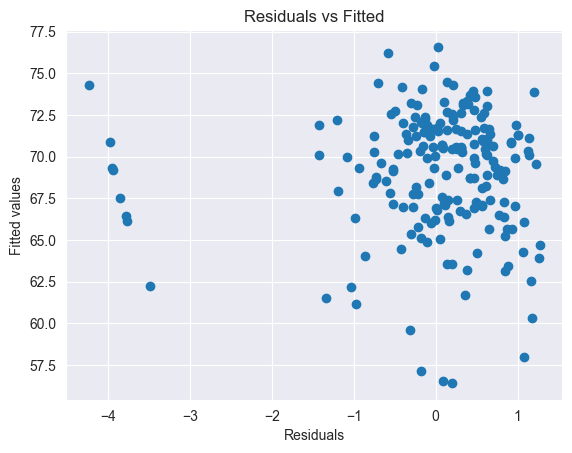

In [15]:
# linearity with fit vs residuals
plt.scatter(res_ols.resid_pearson, res_ols.fittedvalues)
plt.xlabel('Residuals')
plt.ylabel('Fitted values')
plt.title('Residuals vs Fitted')

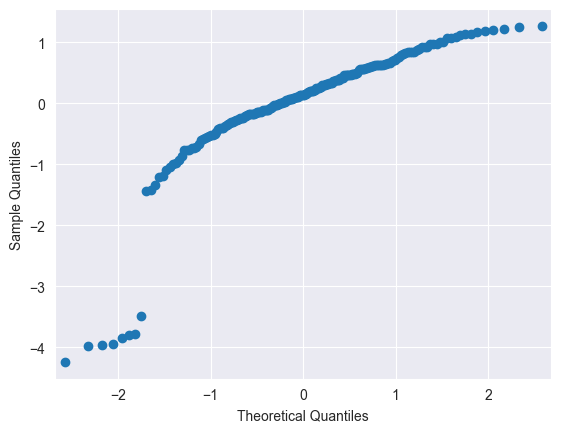

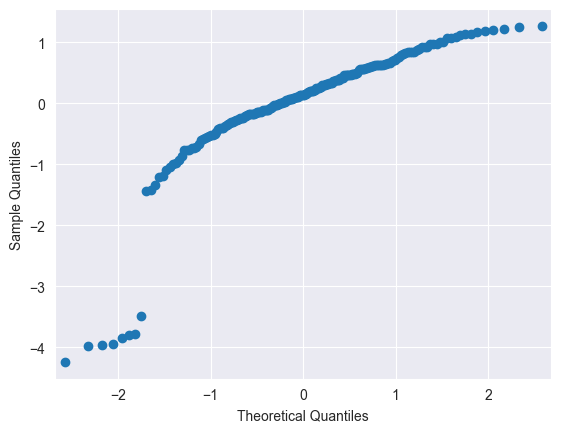

In [9]:
# normality
sm.qqplot(res_ols.resid_pearson)

In [10]:
# perform anderson test
names = ['Anderson Darling test statistic', 'p-value']
test = normal_ad(res_ols.resid_pearson)

lzip(names, test)

[('Anderson Darling test statistic', 10.635289104530045),
 ('p-value', 1.0307003667880222e-25)]

In [13]:
# fit vs residuals
plt.scatter(res_ols.resid_pearson, res_ols.fittedvalues)
plt.xlabel('Residuals')
plt.ylabel('Fitted values')

NameError: name 'res_ols' is not defined

In [12]:
# Equal variances
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test = het_breuschpagan(res_ols.resid_pearson, res_ols.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 6.6354553085418155),
 ('p-value', 0.6750141456454637),
 ('f-value', 0.7244442589770503),
 ('f p-value', 0.6861476318781716)]

In [16]:
# Durbin-Watson test of independence of residuals
durbin_watson(res_ols.resid_pearson)

1.7962175625261685